# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [5]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [130]:
from re import X
# Aquí va su código
def rider(f,A,B,tol,iter=1000):
  iteraciones = iter
  count = 0
  a=A
  b=B
  while count < iteraciones:
    m=(a+b)/2
    fa=f(a)
    fb=f(b)
    fm=f(m)
    if fa*fb > 0:
      print("elegir un intervalo con una raiz dentro")
      break
    s= math.sqrt((fm**2)-fa*fb)
    if s==0:
      break
    else:
      signo = np.sign(fa-fb)
      x1 = m + ((m-a)*fm)*signo/s
    fx1=f(x1)
    if fm*fx1<0:
      a=m
      b=x1
    elif fa*fx1<0:
      b=x1
      fb=fx1
    elif fb*fx1<0:
      a=x1
      fa=fx1
    if abs(fa) < tol:
      break
    count+=1
  return a,count


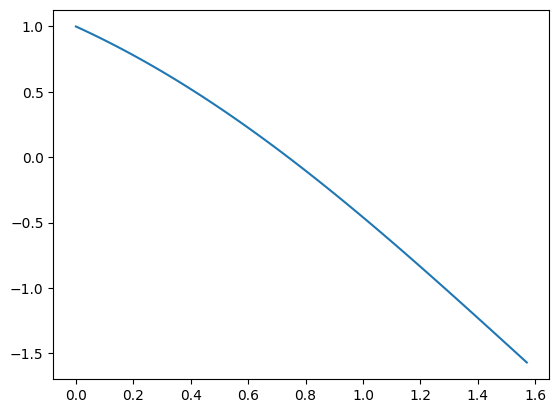

In [113]:
cos = lambda x: math.cos(x) - x
rider(cos,0,(3*(math.pi))/2)
puntos=np.linspace(0,math.pi/2,100)
plt.plot(puntos, [cos(i) for i in puntos])

In [88]:
# Creación de un DataFrame a partir de un diccionario
xdata = []
x=np.linspace(0,math.pi/2,1000)
for i in x:
  xdata.append(i)
#Crear el diccionario
data = {'x': xdata,
        'f(x)': [cos(i) for i in xdata],
        }

df = pd.DataFrame(data)
#Filtrar el dataframe
df_filtrado = df[abs(df['f(x)']) < 1e-3]
print(df_filtrado)

            x     f(x)
470  0.739013  0.00012


In [97]:
bisec=bisect(cos,0.2,1.2,xtol=1e-8)
newt = newton(cos,0.2, tol=1e-8)
print(bisec,newt)

0.7390851274132728 0.7390851332151606


In [91]:
a,x=rider(cos,0.2,1.2)
print(a)
print(x)

#La función Rider sería mucho mejor,
# al hacer todo el proceso en tan solo 3 iteraciones, asegurando un 1e-15
#El valor en Geogebra es 0.74, así, el método es mucho más preciso

0.7390851332151606
3


'Puedo concluir que inicialmente es muy eficiente, para \nepsilons pequeños, pero para mayores precisiones, necesita\ndemasiadas interaciones, en efecto, todas las posibles'

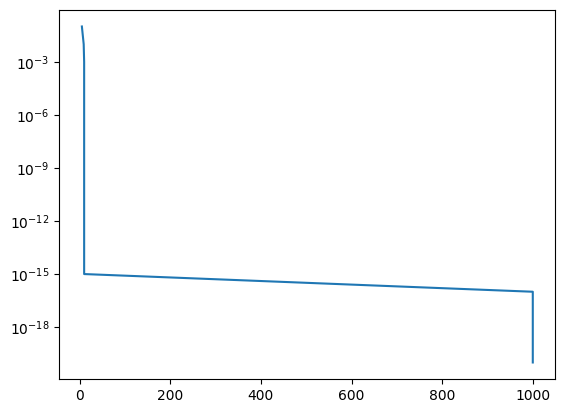

In [144]:

# Tolerancias
tol = np.logspace(-1, -20, 20)
N=[]
for i in tol:
  a,n=rider(cos,-0.5,(3*(math.pi))/2,i)
  N.append(n)

# Grafico semilog

plt.semilogy(N, tol)
"""Puedo concluir que inicialmente es muy eficiente, para
epsilons pequeños, pero para mayores precisiones, necesita
demasiadas interaciones, en efecto, todas las posibles"""


#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





0.8234166457011329


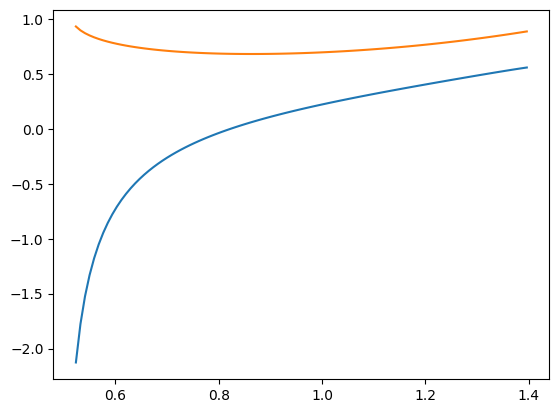

In [157]:
# Aquí va su código
#ok, profesor, what in EARTH KFJKFKJD pero bueno, eso me pasa por meterme a física
A=np.deg2rad(60)
n=1.52
#Aquí simplemente intercambié thetha por x en básicamente todas partes
sthetha= lambda x: x+math.asin(n*math.sin(A-math.asin(math.sin(x)/n)))-A
rthetha= lambda x: math.asin(x/n)
#profe, pues, matemáticas básicas
dsthetha = lambda x: 1-(math.cos(x)*math.cos(A-rthetha(x)))/(math.cos(rthetha(x))*math.sqrt(1-(n**2)*(math.sin(A-rthetha(x)))**2))
#haga sino sumar y restar dkjfjkd
a=np.deg2rad(30)
b=np.deg2rad(80)
x=np.linspace(a,b,100)
plt.plot(x,[dsthetha(i) for i in x])
#el ángulo de incidencia mínimo sería el x que está más cercano a cero, right?
"""honestamente, no comprendo a qué se refiere con "sin derivada" en lo que
respecta a querer hallar la raíz, teniendo en cuenta que el método de Newton,
al no pasarle un parámetro de derivada de la función, simplemente se convierte en
el método de secante según la documentación de Geeksforgeeks, así, lo que haré
será hallar la raíz de la función derivada, ya que ese sería el mínimo local de la función original,
como se puede intuir en la comparación de las gráficas"""
#función original, btw
plt.plot(x,[sthetha(i) for i in x])

raiz=newton(dsthetha,0.6)
print(raiz)

0.49136269851260295


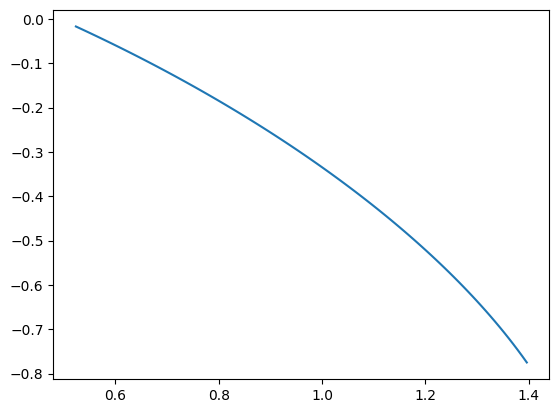

In [160]:
#tristeza, me doy cuenta que esta parte del parcial era más cortica :(, pero bueno
#el seno del B
senoraro = lambda x: math.sin(A-rthetha(x))-(1/n)
plt.plot(x,[senoraro(i) for i in x])

a=bisect(senoraro,0,1)
print(a)
#pues nada, eso es todo, gracias por la paciencia y que tenga buena noche, profesor